In [22]:
# pip install pymoo

In [23]:
# pip install pygmo

In [24]:
from implementation import nsga2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
# from pygmo import hypervolume
import pygmo as pg
from matplotlib import pyplot as plt

In [25]:
from test_functions import ZDT1, ZDT2, ZDT3, ZDT4, ZDT6

In [26]:
def calc_hv_nsga2(population_size, num_variables, num_generations, tournament_size,
                  mutation_prob, elitism_size, objective_function, reference_point):
    """
    Calculate hypervolumen of my implementation of nsga2 algorithm
    """
    final_pareto_front = nsga2(population_size=population_size, 
                         num_variables=num_variables,
                         num_generations=num_generations, 
                         tournament_size=tournament_size,
                         mutation_prob=mutation_prob, 
                         elitism_size=elitism_size,
                         objective_function=objective_function)
    pareto_front = [(ind.fitness[0], ind.fitness[1]) for ind in final_pareto_front]
    pareto_front_array = np.array(pareto_front)
    hv = pg.hypervolume(pareto_front_array)
    return hv.compute(reference_point)

In [27]:
def calc_hv_pymoo(population_size, num_generations, problem_name, reference_point):
    
    problem = get_problem(problem_name)
    algorithm = NSGA2(pop_size=population_size)
    res = minimize(problem, 
                   algorithm, 
                   ('n_gen', num_generations), 
                   seed=1, 
                   verbose=False)
    hv = pg.hypervolume(res.F)
    return hv.compute(reference_point)

In [28]:
hv_nsga2 = calc_hv_nsga2(population_size = 100, num_variables = 30, 
                         num_generations = 200, tournament_size = 3, 
                         mutation_prob = 0.033, elitism_size = 10, objective_function=ZDT2, 
                         reference_point=[1.2,1.5])
hv_pymoo = calc_hv_pymoo(100,200, "zdt2", [1.5,1.5])

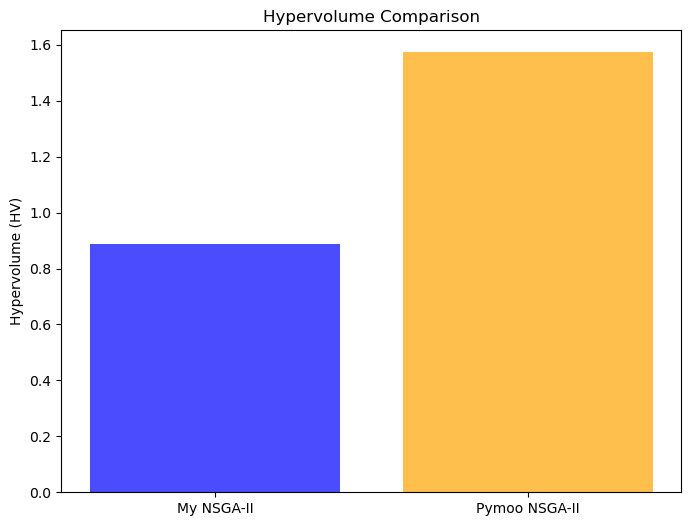

In [29]:
labels = ['My NSGA-II', 'Pymoo NSGA-II']
values = [hv_nsga2, hv_pymoo]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Hypervolume (HV)')
plt.title('Hypervolume Comparison')
plt.show()

In [30]:
def calc_ms_nsga2(population_size, num_variables, num_generations, tournament_size,
                   mutation_prob, elitism_size, objective_function):
    final_pareto_front = nsga2(population_size=population_size, 
                                num_variables=num_variables,
                                num_generations=num_generations, 
                                tournament_size=tournament_size,
                                mutation_prob=mutation_prob, 
                                elitism_size=elitism_size,
                                objective_function=objective_function)
    pareto_front = [(ind.fitness[0], ind.fitness[1]) for ind in final_pareto_front]
    pareto_front = np.array(pareto_front)
    pareto_front_sorted = pareto_front[np.argsort(pareto_front[:, 0])]
    distances = np.linalg.norm(np.diff(pareto_front_sorted, axis=0), axis=1)
    ms = np.sum(distances) / len(distances)
    return ms

In [31]:
def calc_ms_pymoo(population_size, num_generations, problem_name):
    problem = get_problem(problem_name)
    algorithm = NSGA2(pop_size=population_size)
    res = minimize(problem, 
                   algorithm, 
                   ('n_gen', num_generations), 
                   seed=1, 
                   verbose=False)
    pareto_front = res.F
    pareto_front = np.array(pareto_front)
    pareto_front_sorted = pareto_front[np.argsort(pareto_front[:, 0])]
    distances = np.linalg.norm(np.diff(pareto_front_sorted, axis=0), axis=1)
    ms = np.sum(distances) / len(distances) 
    return ms
    

In [32]:
ms_nsga2 = calc_ms_nsga2(population_size = 100, num_variables = 30, 
              num_generations = 200, tournament_size = 3,
              mutation_prob = 0.033, elitism_size = 10, objective_function=ZDT2)
ms_pymoo = calc_ms_pymoo(population_size=100, num_generations= 200, problem_name="zdt2")

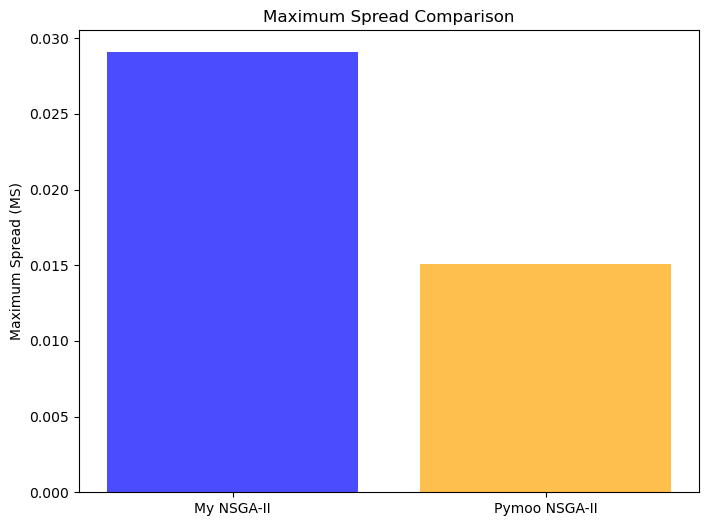

In [33]:
labels = ['My NSGA-II', 'Pymoo NSGA-II']
values = [ms_nsga2, ms_pymoo]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Maximum Spread (MS)')
plt.title('Maximum Spread Comparison')
plt.show()

In [35]:
#TODO napraviti fje koje iscrtavau ovo za porizvoljne parametre!!

In [42]:
final_pareto_front_nsga2 = nsga2(population_size = 100, num_variables = 30, 
              num_generations = 200, tournament_size = 3,
              mutation_prob = 0.033, elitism_size = 10, objective_function=ZDT1)

In [43]:
problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)
final_pareto_front_pymoo = problem.pareto_front()


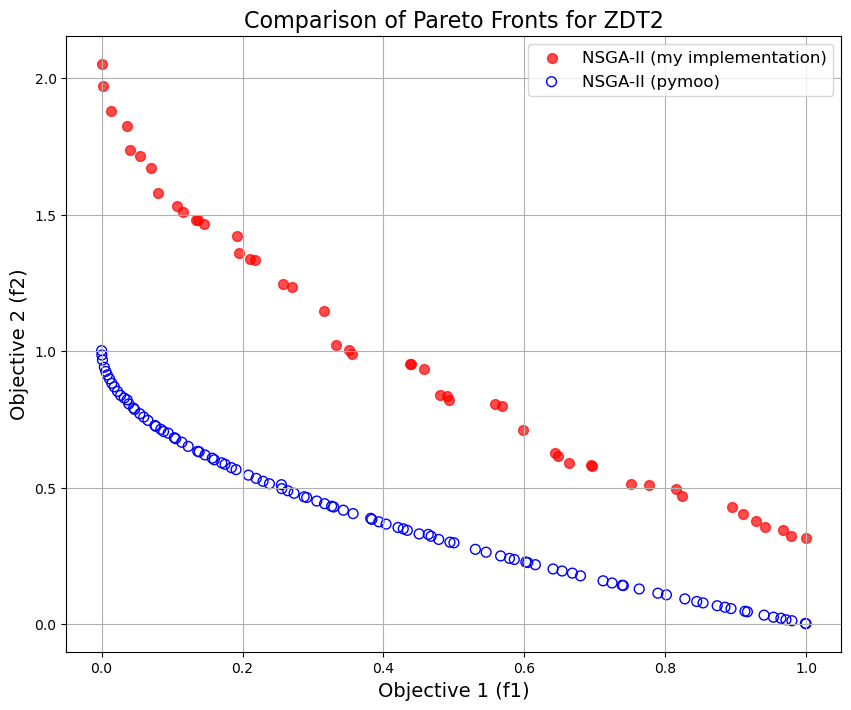

In [45]:
from pymoo.visualization.scatter import Scatter

pareto_f1_values_nsga2 = [ind.fitness[0] for ind in final_pareto_front_nsga2]
pareto_f2_values_nsga2 = [ind.fitness[1] for ind in final_pareto_front_nsga2]

pareto_f1_values_pymoo = res.F[:, 0]
pareto_f2_values_pymoo = res.F[:, 1] 

true_pareto_f1 = final_pareto_front_pymoo[:, 0]
true_pareto_f2 = final_pareto_front_pymoo[:, 1]
plt.figure(figsize=(10, 8))
plt.scatter(pareto_f1_values_nsga2, pareto_f2_values_nsga2, c='red', label='NSGA-II (my implementation)', s=50, alpha=0.7)
plt.scatter(pareto_f1_values_pymoo, pareto_f2_values_pymoo, edgecolor='blue', facecolor='none', label='NSGA-II (pymoo)', s=50)

plt.xlabel('Objective 1 (f1)', fontsize=14)
plt.ylabel('Objective 2 (f2)', fontsize=14)
plt.title('Comparison of Pareto Fronts for ZDT2', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()